<a href="https://colab.research.google.com/github/jim-j-james/PadhAI_Deep_Learning/blob/main/0429_PyTorchCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Outline

* Downloading dataset (CIFAR10)
* `Dataloader` in `torch.utils`
* Visualising images
* Single and multiple convolutional layers
* LeNet
* Training LeNet
* Training on GPU
* Simple visualisation
* Exercises

In [ ]:
#Import the relevent libraries
import torch
import matplotlib.pyplot as plt
import numpy as np

## Data loading

In [ ]:
#Import the computer vision library of PyTorch which is torchvision
#Download the data in to the local folder ./data and convert  to tensor on the way
#The torchvision.datasets will allow us to work with the compressed input data.
#https://www.cs.toronto.edu/~kriz/cifar.html
#https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c
#https://pytorch.org/docs/stable/torchvision/datasets.html
#https://pytorch.org/docs/stable/torchvision/transforms.html
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())

Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
#initialise the 10 classes
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
#https://pytorch.org/docs/stable/data.html
#Load the train data in batches of 4 while shuffling to create some randomness
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [ ]:
#Declare an iter fucntion on the "trainloader" object and the next() function will load the first batch of images and labels.
dataiter = iter(trainloader)
images, labels = dataiter.next()

#4 images from 1 batch,3 channels(R,G,B),32*32 image resolution
print(images.shape)

#1st Image,3 channels(R,G,B),32*32 image resolution
print(images[1].shape)
#First image correspond to index 1 which is a truck
print(labels[1].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
6


## Visualise data

In [ ]:
#Get the first impage which is of type Tensor
img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [ ]:
#Convert to numpy and print the dimensions which is 3*32*32
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [ ]:
# To plot it correctly the dimensions need to be modifeid in the (x,y,z) form compared to the current format (z,x,y)
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(32, 32, 3)


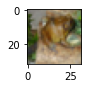

In [ ]:
#The imshow can then display teh actual image abd the size is limited to (1,1) since the defualt size is very high.
plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.show()

In [ ]:
#The above steps are put in to function so that it can be called for a set of images
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

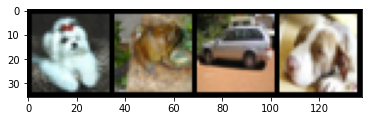

dog frog car dog


In [ ]:
#A grid is made out using the torchvision.utils.make_grid and imshow is applied on top of it to display the grid of 4 images in the batch
#https://pytorch.org/docs/stable/torchvision/utils.html
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

## Single Convolutional Layer

In [ ]:
import torch.nn as nn

class FirstCNN(nn.Module):
    def __init__(self): 
        super(FirstCNN, self).__init__()
        #2D convolution since the kernel deals in 2D,evonthough the image is of 4 dimensions (batch_size,no:Of channels,imageresolution)
        #the Conv2d had the parameters (no of inp channels,no of output channles/kernels,size of kernel 3*3,stride and padding)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=(1,1), stride=(2,2)) # padding=(1,1), stride=(2,2))

    #Create the forward function as applying the convolution operation and returning the output    
    def forward(self, x):
        x = self.conv1(x)
        return x

In [ ]:
net = FirstCNN()

In [ ]:
#Apply the CNN to first set of images and the output will be a batch of 4,16 kernel output and of size 16*16  stride of 2 
#while padding(1,1) will keep the dimensions same for kernel size of 3*3
out = net(images)
out.shape

torch.Size([4, 16, 16, 16])

In [ ]:
#On displaying the parameters of the model we have
#torch.Size([16, 3, 3, 3]) - 16 weights, 3 input channles,3*3 kernel - Total - 16*3*3 -151 weight parameters
#torch.Size([16])  - Biases
for param in net.parameters():
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [ ]:
#printing the shape of first kernal output from 1st batch 1st image
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(16, 16)


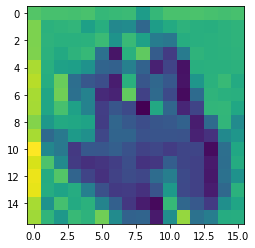

In [ ]:
#The image is showilg an outline of the plane in first image
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

## Deep Convolutional Network

In [ ]:
class FirstCNN_v2(nn.Module):
    def __init__(self): 
        super(FirstCNN_v2, self).__init__()
        self.model = nn.Sequential(
            #Stacking 3 convolutional networks where the first one has 8 channels and 2nd one take sthe input as 8 and has 16 channels. the output will be (N, 16, 28, 28)
            nn.Conv2d(3, 8, 3),   # (N, 3, 32, 32) -> (N, 8, 30, 30)
            nn.Conv2d(8, 16, 3)   # (N, 8, 30, 30) -> (N, 16, 28, 28)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

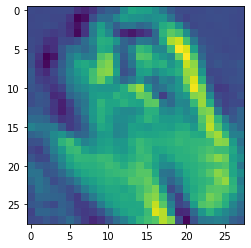

In [ ]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [ ]:
class FirstCNN_v3(nn.Module):
    def __init__(self): 
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            #apply 4 layers with 2 convolution followed by AvgPool2d. The AvgPool2d functtion is taking 2*2 filter with stride of 2 there by cutting the size in to half
            nn.Conv2d(3, 6, 5),          # (N, 3, 32, 32) -> (N, 6, 28, 28)
            nn.AvgPool2d(2, stride=2),   # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),         # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.AvgPool2d(2, stride=2)    # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

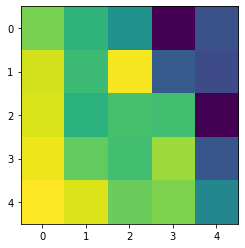

In [ ]:
#1st 5*5 image and corresponding 1st channel
plt.imshow(out[0, 0, :, :].detach().numpy())

## LeNet

In [ ]:
#applying the LeNet code
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        #CNN part of the LeNet model
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        #Fully connected part of the LeNet Model
        #before applting the LeNEt a faltenning operation need to be done from (N, 16, 5, 5)-->(N, 400)
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    #apply the cnn model
    
    def forward(self, x):
        print(x.shape)
        #Apply the cnn_model
        x = self.cnn_model(x)
        print(x.shape)
        #the 16*5*5 should be flatenned before apllting the 400 FC layer
        #apply x.view(x.size(0), -1) which will retain the same dimension as N follwed by a collapse of all other indicated by -1 which is 16*5*5=400    
        x = x.view(x.size(0), -1)
        print(x.shape)
        #not applying the soft max for inference as the maximum value out of the 10 classes will be the maximum in sigmoid as well.
        #but important in back propagation as the sigmoid function is part of the cross entropy loss function
        x = self.fc_model(x)
        print(x.shape)
        return x

In [ ]:
#Apply it on 4 images
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [ ]:
#output is printed as a tensor object wit grad_fn as well so that we can apply the back propagation.
#The maximum value will correspond to teh prediction
print(out)

tensor([[ 0.0244,  0.0601, -0.0655,  0.0170, -0.0396,  0.0251,  0.0073, -0.0971,
         -0.0831,  0.0025],
        [ 0.0199,  0.0353, -0.0844, -0.0012, -0.0416,  0.0133,  0.0014, -0.0921,
         -0.0792, -0.0017],
        [ 0.0081,  0.0464, -0.0890, -0.0028, -0.0434,  0.0252,  0.0138, -0.0994,
         -0.0806, -0.0124],
        [ 0.0210,  0.0544, -0.0788,  0.0070, -0.0424,  0.0428,  0.0307, -0.1056,
         -0.0773, -0.0100]], grad_fn=<AddmmBackward>)


In [ ]:
#get teh max values and assosaited prediction class and all of them are same since it is the first pass
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([1, 1, 1, 1])


## Training LeNet

In [ ]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [ ]:
#The batch size is taken as 128 as a power of 2 as GPU's work best on batc sizes with powere of 2
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
#Evaluation function for test and train sets
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [ ]:
net = LeNet()

In [ ]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 36.70, Train acc: 36.35
Epoch: 1/16, Test acc: 43.57, Train acc: 43.96
Epoch: 2/16, Test acc: 46.17, Train acc: 46.81
Epoch: 3/16, Test acc: 48.99, Train acc: 50.78
Epoch: 4/16, Test acc: 51.09, Train acc: 53.28
Epoch: 5/16, Test acc: 51.11, Train acc: 53.98
Epoch: 6/16, Test acc: 52.82, Train acc: 56.53
Epoch: 7/16, Test acc: 54.18, Train acc: 58.17
Epoch: 8/16, Test acc: 54.65, Train acc: 59.69
Epoch: 9/16, Test acc: 54.72, Train acc: 60.28
Epoch: 10/16, Test acc: 54.27, Train acc: 60.16
Epoch: 11/16, Test acc: 54.83, Train acc: 62.33
Epoch: 12/16, Test acc: 55.35, Train acc: 63.20
Epoch: 13/16, Test acc: 55.54, Train acc: 63.99
Epoch: 14/16, Test acc: 56.10, Train acc: 64.51
Epoch: 15/16, Test acc: 56.06, Train acc: 65.12


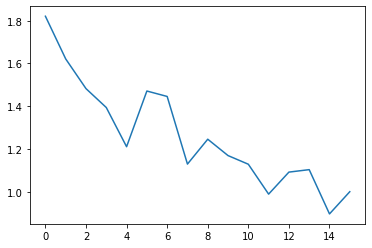

CPU times: user 6min 42s, sys: 6.43 s, total: 6min 48s
Wall time: 6min 50s


In [ ]:
#Run the model on CPU
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

## Move to GPU

In [ ]:
#Run the model on GPU for comparable results
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [ ]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [ ]:
%%time
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16
CPU times: user 1min 28s, sys: 494 ms, total: 1min 29s
Wall time: 1min 29s


In [ ]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 55.58, Train acc: 65.34


## Basic Visualisation

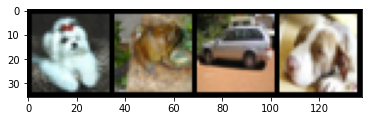

In [ ]:
imshow(torchvision.utils.make_grid(images))

In [ ]:
#transfer all to cpu
net = net.to('cpu')

In [ ]:
#output is 4 images with 10 classes each
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [ ]:
#net.cnn_model gets all the cnn layers applied and net.cnn_model[0] will be the o/p of first layer
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

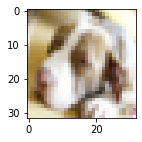

In [ ]:
image_id = 3
plt.figure(figsize = (2,2))
imshow(images[image_id,])

In [ ]:
#net.cnn_model gets all the cnn layers applied and net.cnn_model[0] will be the o/p of first layer
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


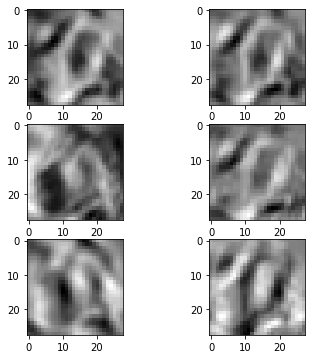

In [ ]:
#print the output of 6 seperate channels
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()

In [ ]:
#net.cnn_model gets all the cnn layers applied and net.cnn_model[0] will be the o/p of first layer
out = net.cnn_model(images)
print(out.shape)
#print(out)

torch.Size([4, 16, 5, 5])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


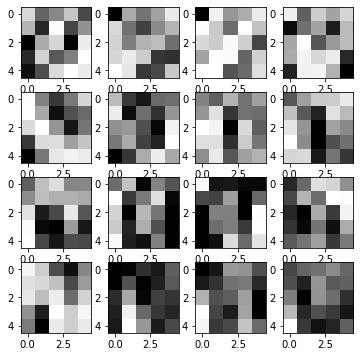

In [ ]:
#print the output of 16 seperate channels
plt.figure(figsize = (6,6))
plt.subplot(441)
for i in range(16):
    ax1 = plt.subplot(4, 4, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()

## Exercises

* Modify LeNet to work with ReLU instead of Tanh -> What is the impact on training time, final loss
* We have observed over-fitting -> Use weight_decay in torch.optim to add L2 regularisation
* Instead of CIFAR10, use the MNIST data available from `torchvision.datasets.MNIST`. Download and visualise MNIST data.
* But importantly MNIST images have only 1 channel instead of 3 channels in the case of CIFAR10. Modify LeNet to work with MNIST. Train and find optimised test accuracy.